In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
PICKLE_DIR = "urbansounds_pickles" 
EPOCH_NUM = 10

In [3]:
X_train = pickle.load(open(os.path.join(PICKLE_DIR,"X_train.pickle"), "rb"))
y_train = pickle.load(open(os.path.join(PICKLE_DIR,"y_train.pickle"), "rb"))

X_val = pickle.load(open(os.path.join(PICKLE_DIR,"X_val.pickle"), "rb"))
y_val = pickle.load(open(os.path.join(PICKLE_DIR,"y_val.pickle"), "rb"))

X_test = pickle.load(open(os.path.join(PICKLE_DIR,"X_test.pickle"), "rb"))
y_test = pickle.load(open(os.path.join(PICKLE_DIR,"y_test.pickle"), "rb"))

In [4]:
X_train[0].shape

(128, 96, 1)

In [5]:
# IMG_SIZE = 256
NUM_CLASSES = 10
INPUT_SHAPE = X_train[0].shape

In [6]:
len(X_test), len(y_test)

(1366, 1366)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 94, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 20, 64)        3

In [8]:
history = model.fit(X_train, y_train, epochs=EPOCH_NUM, validation_data=(X_val, y_val), verbose=1)

Train on 6000 samples, validate on 1366 samples
Epoch 1/10
6000/6000 [==============================] - 5s 839us/sample - loss: 2.1056 - accuracy: 0.2655 - val_loss: 1.5205 - val_accuracy: 0.4817
Epoch 2/10
6000/6000 [==============================] - 3s 437us/sample - loss: 1.4434 - accuracy: 0.4797 - val_loss: 1.1827 - val_accuracy: 0.6025
Epoch 3/10
6000/6000 [==============================] - 3s 441us/sample - loss: 1.1933 - accuracy: 0.5858 - val_loss: 0.9584 - val_accuracy: 0.6918
Epoch 4/10
6000/6000 [==============================] - 3s 443us/sample - loss: 1.0314 - accuracy: 0.6395 - val_loss: 0.8541 - val_accuracy: 0.7094
Epoch 5/10
6000/6000 [==============================] - 3s 437us/sample - loss: 0.8810 - accuracy: 0.6940 - val_loss: 0.7797 - val_accuracy: 0.7533
Epoch 6/10
6000/6000 [==============================] - 3s 438us/sample - loss: 0.7903 - accuracy: 0.7260 - val_loss: 0.7472 - val_accuracy: 0.7584
Epoch 7/10
6000/6000 [==============================] - 3s 444us

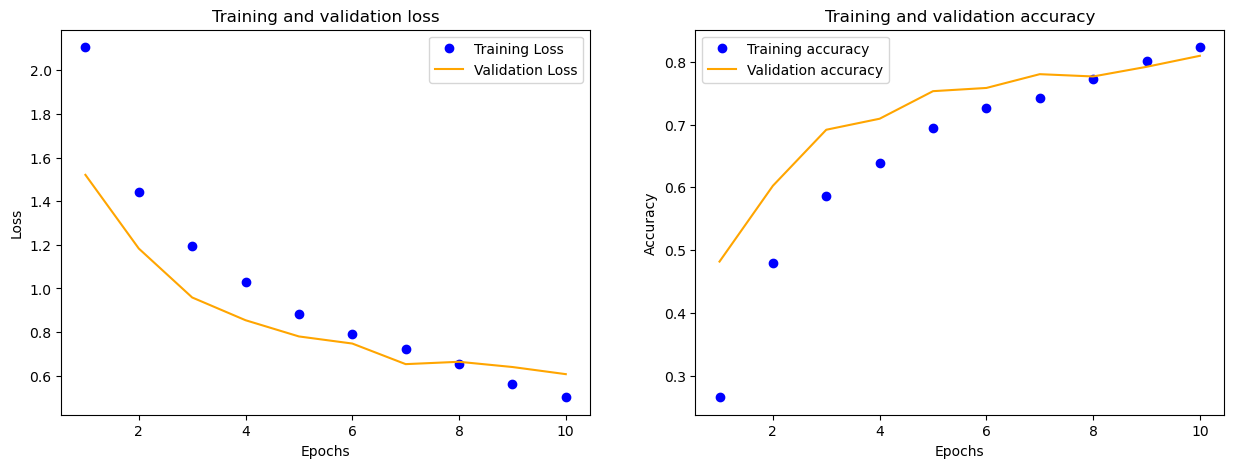

In [9]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,EPOCH_NUM+1)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()